In [1]:
%matplotlib inline

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from keras import metrics

from keras.layers import Dense, Activation, Conv1D, Convolution1D, Flatten
from keras.models import Model, Sequential
from keras import initializations

# Create a dataset that approximates a linear function with some noise

f(x)=0.2+0.4x2+0.3xsin(15x)+0.05cos(50x)

In [3]:
## Define our weird function for this excercise
def weird_function(x):
    """
    Returns the y value for the given x using the following formula
    f(x)=0.2+0.4x^2+0.3xsin(15x)+0.05cos(50x)
    """
    y = 0.2+0.4*math.pow(x,2)+0.3*x*math.sin(15*x)+0.05*math.cos(50*x)

    return y

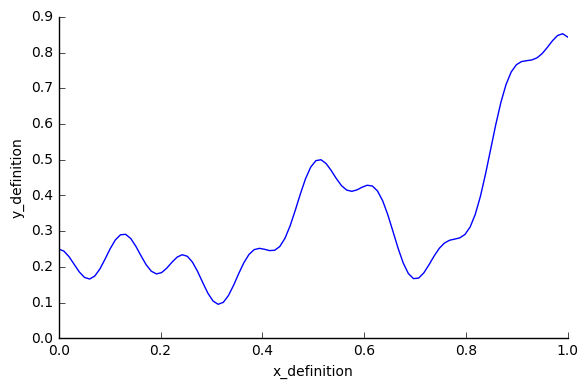

In [142]:
import matplotlib.ticker as ticker
size = 100
## Plot our weird function
x = np.linspace(0., 1., size)
df = pd.DataFrame({'x_definition':x})
df['y_definition'] = df['x_definition'].apply(lambda x: weird_function(x))

g = sns.FacetGrid(df, size=4, aspect=1.5)
g.map(plt.plot, "x_definition", "y_definition")

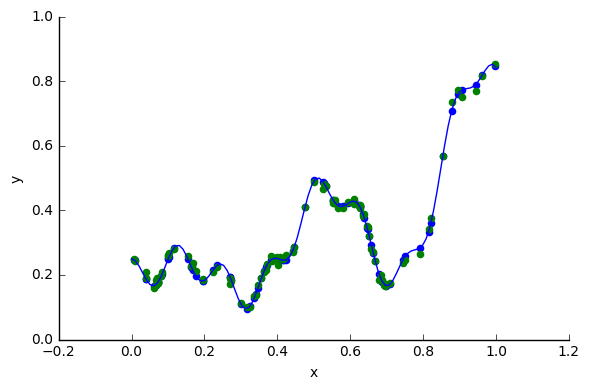

In [143]:
## Set the mean, standard deviation, and size of the dataset, respectively
mu, sigma = 0, 0.01

## Create a uniformally distributed set of X values between 0 and 1 and store in pandas dataframe
x = np.random.uniform(0,1, size)
df['x'] = x

## Find the "perfect" y value corresponding to each x value given
df['y_perfect'] = df['x'].apply(lambda x: weird_function(x))


## Create some noise and add it to each "perfect" y value to create a realistic y dataset
df['noise'] = np.random.normal(mu, sigma, size=(size,))
df['y'] = df['y_perfect']+df['noise']

g = sns.FacetGrid(df, size=4, aspect=1.5)
g.map(plt.plot, "x_definition", "y_definition")
g.map(plt.scatter, "x", "y_perfect", color='blue')
g.map(plt.scatter, "x", "y", color='green')


In [87]:
## Create our model with a single dense layer, with a linear activation function and glorot (Xavier) input normalization
model = Sequential([
        Dense(1000, activation='relu', input_dim=1, init='uniform'),
        #Convolution1D(64, 5, activation='relu', batch_input_shape=(32, 1, size)),
        Dense(100, activation='relu', init='uniform'),
        Dense(10, activation='relu', init='uniform'),
        
        Dense(output_dim=1, activation='linear')
        
    ])

## Compile our model using the method of least squares (mse) loss function 
## and a stochastic gradient descent (sgd) optimizer
model.compile(loss='mse', optimizer='Adam') 

## Set our learning rate to 0.01 and print it
model.optimizer.lr.set_value(.01)

history = model.fit(x=df['x'], y=df['y'], validation_split=0.2, batch_size=32, nb_epoch=500)


Train on 81 samples, validate on 21 samples
Epoch 1/500
81/81 [==============================] - 0s - loss: 0.1251 - val_loss: 0.0485
Epoch 2/500
81/81 [==============================] - 0s - loss: 0.0342 - val_loss: 0.0511
Epoch 3/500
81/81 [==============================] - 0s - loss: 0.0292 - val_loss: 0.0359
Epoch 4/500
81/81 [==============================] - 0s - loss: 0.0241 - val_loss: 0.0327
Epoch 5/500
81/81 [==============================] - 0s - loss: 0.0215 - val_loss: 0.0338
Epoch 6/500
81/81 [==============================] - 0s - loss: 0.0202 - val_loss: 0.0283
Epoch 7/500
81/81 [==============================] - 0s - loss: 0.0193 - val_loss: 0.0279
Epoch 8/500
81/81 [==============================] - 0s - loss: 0.0191 - val_loss: 0.0272
Epoch 9/500
81/81 [==============================] - 0s - loss: 0.0192 - val_loss: 0.0257
Epoch 10/500
81/81 [==============================] - 0s - loss: 0.0203 - val_loss: 0.0242
Epoch 11/500
81/81 [==============================] - 0

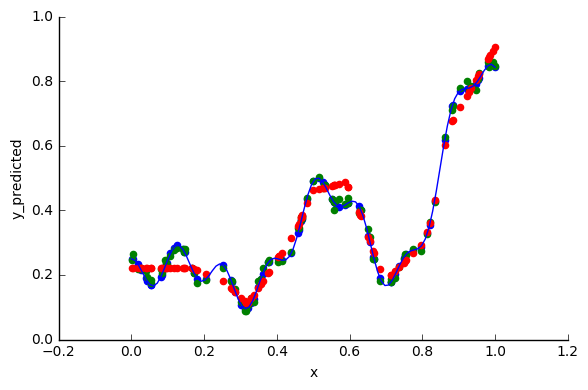

In [141]:
## Create our predicted y's based on the model
df['y_predicted'] = model.predict(df['x'], batch_size=32, verbose=0)

g = sns.FacetGrid(df, size=4, aspect=1.5)
g.map(plt.plot, "x_definition", "y_definition")
g.map(plt.scatter, "x", "y_perfect", color='blue')
g.map(plt.scatter, "x", "y", color='green')
g.map(plt.scatter, "x", "y_predicted", color='red')


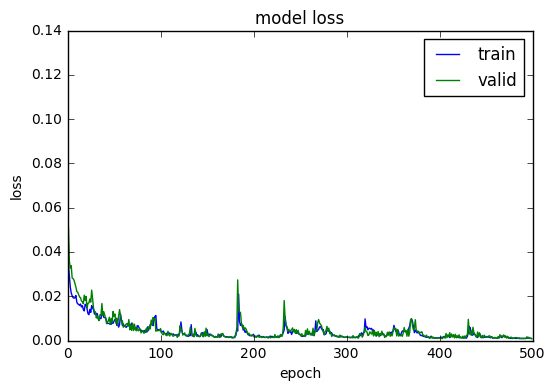

In [138]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [104]:
model.get_weights()[8].shape

IndexError: list index out of range